In [1]:
from fastai.tabular import *
from fastai import *
from fastai.core import Path

In [2]:
Path

pathlib.Path

In [3]:
! pwd

/home/ec2-user/SageMaker/predict_ratings_from_review_comments/train


In [4]:
ROOT_PATH = Path('/home/ec2-user/SageMaker/predict_ratings_from_review_comments')
DATA_PATH = ROOT_PATH/'data'
SAVED_MODEL_PATH = ROOT_PATH/'saved_models'

In [5]:
reviews_csv_path = DATA_PATH/'reviews_with_category.csv'

In [6]:
df = pd.read_csv(reviews_csv_path); df

,Unnamed: 0,product_id,product,brand,id,cosmetics_review_id,user_nickname,rating,review_text,review_title,...,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,age,eyeColor,hairConcerns,product_category_primary,product_category_secondary
0,0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,0ba8b592-4a23-497e-a552-7a00d2aab624,09e96669-6277-48b1-9e81-a41adec3bea1,NaN,5,"Until now, this was only available at very hig...",My Favorite Perfume!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,9e4619a8-e16d-4a7e-8147-24648db5b06e,8d998af2-04ad-4ac9-8304-c29b798f6e80,charlie201,5,This is another excellent product that complim...,NaN,...,NaN,NaN,NaN,yes,NaN,35to44,NaN,NaN,Men,Shaving
2,2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,c839ee43-074b-48e6-98a9-1d2350192ec9,9332d1b1-abc0-43ee-b8f7-0aaf4fabf1df,sz123,1,This starts out smelling like a delieghtfully ...,I'll pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,fcd90538-4465-4ca3-8c27-734b4d81c6c8,09e96669-6277-48b1-9e81-a41adec3bea1,dolceragazza,5,I have received lots of compliments when I wea...,love it!!!!,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN
4,4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,4478b6f8-27a4-4585-a829-e7e3bb226f50,1bcabd81-b7ce-453c-bd39-5267272fc3ee,MouseRat,5,I grabbed this deluxe sample for my boyfriend ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN
5,5,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,a72059c5-0aad-4f87-a489-38f7f02a30ea,1bcabd81-b7ce-453c-bd39-5267272fc3ee,MaggieV18,5,I got a sample for my fiance and he loved it s...,NaN,...,NaN,NaN,NaN,yes,NaN,18to24,NaN,NaN,Men,NaN
6,6,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,9f301430-067b-428b-9fe0-360a86318dca,1bcabd81-b7ce-453c-bd39-5267272fc3ee,dafauk,4,I use this and I'm a girl (if that matters at ...,Smells like.... dog shampoo?,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Men,NaN
7,7,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,31bb84fb-1415-46c5-9b07-9559678f398f,1bcabd81-b7ce-453c-bd39-5267272fc3ee,beautyman,4,"I like this cleanser. It smells good, kind of ...","Cleansing, smells great",...,NaN,NaN,NaN,yes,NaN,25to34,NaN,NaN,Men,NaN
8,8,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,ec333234-1b85-41d3-a2b9-d049cedcf99f,1bcabd81-b7ce-453c-bd39-5267272fc3ee,rickycn,5,i was looking for a good facial cleanser and i...,GREAT!,...,NaN,NaN,NaN,no,NaN,25to34,NaN,NaN,Men,NaN
9,9,51f1e81a-d5b2-40ba-9a93-c2aad0cf493b,The 4 Elements of the Perfect Shave&#x2122; Ca...,The Art of Shaving,5fa4250b-2323-495d-90cd-b36e8322b4d0,a3bd8b6d-bae0-46b2-b12e-a7876aa8d629,kdo78,5,Purchased for a friend who has very sensitive ...,Awesome Product!,...,NaN,NaN,NaN,yes,NaN,25to34,NaN,NaN,Men,NaN


### Remove unwanted columns and keep review text and id for deduplication

In [7]:
relevant_df = df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating', 
    'id',     
    'review_text',      
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',                  
    'beautyInsider',    
    'skinTone',
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]
relevant_df.head()

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,0ba8b592-4a23-497e-a552-7a00d2aab624,"Until now, this was only available at very hig...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,9e4619a8-e16d-4a7e-8147-24648db5b06e,This is another excellent product that complim...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,fcd90538-4465-4ca3-8c27-734b4d81c6c8,I have received lots of compliments when I wea...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,4478b6f8-27a4-4585-a829-e7e3bb226f50,I grabbed this deluxe sample for my boyfriend ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN


### Deduplicate with product_id, user_nickname and review_text

In [8]:
dedup_revelant_df = relevant_df.drop_duplicates(
    subset=['product_id', 'user_nickname', 'review_text'], 
    keep='first', 
    inplace=False)

dedup_revelant_df

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,0ba8b592-4a23-497e-a552-7a00d2aab624,"Until now, this was only available at very hig...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,9e4619a8-e16d-4a7e-8147-24648db5b06e,This is another excellent product that complim...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,fcd90538-4465-4ca3-8c27-734b4d81c6c8,I have received lots of compliments when I wea...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,4478b6f8-27a4-4585-a829-e7e3bb226f50,I grabbed this deluxe sample for my boyfriend ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN
5,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MaggieV18,5,a72059c5-0aad-4f87-a489-38f7f02a30ea,I got a sample for my fiance and he loved it s...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,18to24,NaN,Men,NaN
6,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,dafauk,4,9f301430-067b-428b-9fe0-360a86318dca,I use this and I'm a girl (if that matters at ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Men,NaN
7,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,beautyman,4,31bb84fb-1415-46c5-9b07-9559678f398f,"I like this cleanser. It smells good, kind of ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,NaN
8,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,rickycn,5,ec333234-1b85-41d3-a2b9-d049cedcf99f,i was looking for a good facial cleanser and i...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,25to34,NaN,Men,NaN
9,51f1e81a-d5b2-40ba-9a93-c2aad0cf493b,The 4 Elements of the Perfect Shave&#x2122; Ca...,The Art of Shaving,kdo78,5,5fa4250b-2323-495d-90cd-b36e8322b4d0,Purchased for a friend who has very sensitive ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,NaN


### Fetch users who have contributed 3 or more comments

In [11]:
grouped_by_users_df = (dedup_revelant_df.groupby(['user_nickname'])
                                        .count()
                                        .sort_values(['product_id'], ascending=False))
grouped_by_users_df.head()

,product_id,product,brand,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
user_nickname,,,,,,,,,,,,,,,,,,,,
dreamyone,135,135,135,135,135,135,0,0,0,35,0,0,0,0,135,78,135,43,135,99
tenngal,66,66,66,66,66,66,0,0,0,27,0,1,0,0,66,46,66,19,66,52
Mochapj,48,48,48,48,48,48,25,3,7,46,25,0,45,1,1,45,1,45,48,29
jonieku,45,45,45,45,45,45,40,0,22,45,40,9,45,8,0,45,15,45,45,26
bakeamuffin,37,37,37,37,37,37,19,4,12,37,19,0,37,5,0,37,2,37,37,21


### Select users that have more than 3 reviews

In [17]:
more_than_2_reviews_users_df = grouped_by_users_df[grouped_by_users_df['product_id'] >= 3]
more_than_2_reviews_users_df

,product_id,product,brand,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
user_nickname,,,,,,,,,,,,,,,,,,,,
dreamyone,135,135,135,135,135,135,0,0,0,35,0,0,0,0,135,78,135,43,135,99
tenngal,66,66,66,66,66,66,0,0,0,27,0,1,0,0,66,46,66,19,66,52
Mochapj,48,48,48,48,48,48,25,3,7,46,25,0,45,1,1,45,1,45,48,29
jonieku,45,45,45,45,45,45,40,0,22,45,40,9,45,8,0,45,15,45,45,26
bakeamuffin,37,37,37,37,37,37,19,4,12,37,19,0,37,5,0,37,2,37,37,21
twingrandma,35,35,35,35,35,35,22,1,13,27,22,5,19,2,14,21,33,21,35,20
veronika23,35,35,35,35,35,35,18,1,0,0,18,0,0,0,4,29,29,0,35,23
boww,34,34,34,34,34,34,14,0,5,13,14,0,13,5,0,15,17,15,34,19
Tamara76,32,32,32,32,32,32,15,2,14,29,15,0,28,3,2,29,0,28,32,23


### Select user nicknames from the dataframe


In [18]:
user_nicknames = more_than_3_reviews_users_df.axes[0]; 
user_nicknames.tolist()

['dreamyone',
 'tenngal',
 'Mochapj',
 'jonieku',
 'bakeamuffin',
 'twingrandma',
 'veronika23',
 'boww',
 'Tamara76',
 'DressageQueen86',
 'Stefanie0023',
 'LovetoLoveLife',
 'lucas538',
 'nyaxa',
 'sbsunshine',
 'jeankn',
 'LolaDiva',
 'stellasmommy04',
 'Kim888',
 'gigjig',
 'Catwomanca',
 'kittycatgirlmeow',
 'sydtomato',
 'tryingtosoothe',
 'JennRen44',
 'dancingdream99',
 'Margalee',
 'tinazhang718',
 'nasnousa',
 'Wolfgirl22',
 'baerro',
 'greeneyedgirl107',
 'gonerogue',
 'artemisgem',
 'yaide',
 'darlyndar',
 'Honeyandtea2012',
 'MamaBare27',
 'itsryanwithani',
 'BrittanyRenee30',
 'halojones',
 'samesandy',
 'sedonath',
 'tikotiko',
 'mizeet',
 'MidnightDreamer',
 'TheMACIsBack',
 'ssarah',
 'EndofaneraADTR',
 'steamin',
 'TamTam01',
 'macki',
 'IndyQT317',
 'blackbimmer',
 'desertgirl501',
 'KittyMPryde',
 'Llifts',
 'sarahshter',
 'LaylaKitten',
 'makeupfreak12',
 'churinl',
 'beautyjunkie1',
 'kithkath',
 'arielrose',
 'madaraismine',
 'jennywasko',
 'Michylol',
 'rebekah3

In [19]:
relevant_df = dedup_revelant_df[dedup_revelant_df['user_nickname'].isin(user_nicknames.tolist())]
relevant_df

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
5,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MaggieV18,5,a72059c5-0aad-4f87-a489-38f7f02a30ea,I got a sample for my fiance and he loved it s...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,18to24,NaN,Men,NaN
7,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,beautyman,4,31bb84fb-1415-46c5-9b07-9559678f398f,"I like this cleanser. It smells good, kind of ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,NaN
8,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,rickycn,5,ec333234-1b85-41d3-a2b9-d049cedcf99f,i was looking for a good facial cleanser and i...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,25to34,NaN,Men,NaN
13,439cb46c-53e5-4188-91d0-0d4c0f1224fd,Shaving Cream - Sandalwood,The Art of Shaving,arleneto,5,fe322161-0d96-4048-92bb-1c4a92f7eb59,this shaving cream is awsome !!!!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35to44,NaN,Men,Shaving
15,9d4a9592-30e8-43f7-82f1-aee20f70941e,Pre-Shave Oil - Lavender,The Art of Shaving,elizbeth1972,5,58949496-64ee-4392-8284-9e69fa9b4ac1,"According to my brother, this is the best prod...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,Shaving
17,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe,Facial Scrub,Anthony,Splurger,5,4cc3111f-a0bc-4a0a-b99e-6c5f81b80371,Great Mens Facial Scrub. It's not too tough on...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,18to24,NaN,Men,Skincare
20,dc77dd2a-6de1-4f43-bfcb-063ce5a5bb0c,Astringent Toner Pads,Anthony,alohakev,5,1441505e-abb9-4765-b1f4-f7a04e76744a,"These pads, though pricey, are great. Before I...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,NaN
23,e52fe43f-5069-49ea-a5b3-350bec3ade2a,High Performance Continuous Moisture Eye Cream,Anthony,bestbrother,4,34964730-fcc5-4955-ba9f-593368423926,i like the light weight texture. it hydration ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,45to54,NaN,Men,Skincare
24,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe,Facial Scrub,Anthony,AngyInToronto,5,510e8596-d006-448e-b12d-898d997d2f2d,Bought this for my best friend when I was mort...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,Skincare


### Create the dataframe to be used for training

In [22]:
analysis_df = relevant_df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating',    
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'beautyInsider',    
    'skinTone',
    'hairConcerns',                                     
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]

analysis_df['product_id_name'] = analysis_df['product_id'] + "_" + analysis_df['product'].astype(str) + "_ " + analysis_df['brand'].astype(str)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
analysis_df

,product_id,product,brand,user_nickname,rating,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,hairConcerns,age,eyeColor,product_category_primary,product_category_secondary,product_id_name
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN,3858badd-8a32-4775-996b-8f08197dffaf_Orange Sa...
5,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MaggieV18,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,18to24,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...
7,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,beautyman,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,25to34,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...
8,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,rickycn,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,25to34,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...
13,439cb46c-53e5-4188-91d0-0d4c0f1224fd,Shaving Cream - Sandalwood,The Art of Shaving,arleneto,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35to44,NaN,Men,Shaving,439cb46c-53e5-4188-91d0-0d4c0f1224fd_Shaving C...
15,9d4a9592-30e8-43f7-82f1-aee20f70941e,Pre-Shave Oil - Lavender,The Art of Shaving,elizbeth1972,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,25to34,NaN,Men,Shaving,9d4a9592-30e8-43f7-82f1-aee20f70941e_Pre-Shave...
17,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe,Facial Scrub,Anthony,Splurger,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,18to24,NaN,Men,Skincare,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe_Facial Sc...
20,dc77dd2a-6de1-4f43-bfcb-063ce5a5bb0c,Astringent Toner Pads,Anthony,alohakev,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,25to34,NaN,Men,NaN,dc77dd2a-6de1-4f43-bfcb-063ce5a5bb0c_Astringen...
23,e52fe43f-5069-49ea-a5b3-350bec3ade2a,High Performance Continuous Moisture Eye Cream,Anthony,bestbrother,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,45to54,NaN,Men,Skincare,e52fe43f-5069-49ea-a5b3-350bec3ade2a_High Perf...
24,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe,Facial Scrub,Anthony,AngyInToronto,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,Skincare,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe_Facial Sc...


### Train


In [33]:
analysis_df.shape
48314 * 20/100
2000 + 9662

11662

In [27]:
dep_var = 'rating'
cat_names = ['product_id_name',     
    'user_nickname',       
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',         
    'beautyInsider',
    'skinTone',
    'eyeColor',
    'age',          
    'product_category_primary',
    'product_category_secondary']
cont_names = []
procs = [FillMissing, Categorify, Normalize]

In [34]:
test = TabularList.from_df(analysis_df.iloc[500:1000].copy(), path=DATA_PATH, cat_names=cat_names, cont_names=cont_names)

In [35]:
data = (TabularList.from_df(analysis_df, cat_names=cat_names, procs=procs)
                   .split_by_idx(list(range(2000, 11662)))
                   .label_from_df(cols=dep_var)
                   .add_test(test)
                   .databunch(bs=512))


In [36]:
data.show_batch(rows=15)

product_id_name,user_nickname,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,eyeColor,age,product_category_primary,product_category_secondary,target
c81350de-f645-4b59-9aee-a6a523ec6e3b_Wild With Desire Lipstick_ rms beauty,kittin,#na#,#na#,#na#,normal,#na#,#na#,blonde,#na#,#na#,porcelain,#na#,#na#,Makeup,#na#,5
081f73c0-a7d5-4d9b-bc9a-46028b9fe85e_Jet Lag Mask_ Summer Fridays,justingangle,#na#,#na#,#na#,combination,#na#,#na#,brunette,#na#,#na#,medium,brown,over54,Skincare,Masks,5
40fd9352-17a1-4623-bceb-fe7c90a99989_Gold Camellia Beauty Oil_ Tatcha,chemistrymegan,False,#na#,acne,combination,False,#na#,red,#na#,#na#,porcelain,green,#na#,Skincare,Moisturizers,5
93a19dec-9f98-43d8-b755-cf46e1a97c9b_EradiKate&#x2122; Acne Treatment_ Kate Somerville,Harpier82,False,#na#,#na#,combination,False,#na#,#na#,#na#,yes,#na#,#na#,25to34,Skincare,Treatments,4
1bbcf871-c3ec-4f21-9052-304a825a3ef1_Egg Mousse Soap Facial Cleanser_ Too Cool For School,LoveMissL,False,#na#,#na#,combination,False,#na#,#na#,#na#,yesvibr,#na#,#na#,25to34,Skincare,#na#,4
8660ba17-0362-4c00-a88a-7706b4e6a09b_Soleil Neige Highlighter &amp; Blush Glow Stick_ TOM FORD,Mochapj,False,True,aging,combination,False,#na#,brunette,#na#,#na#,olive,brown,#na#,Makeup,Face,4
93c8abbb-51e2-49b3-a34d-1255c3a9fc83_No. 4 Bond Maintenance&#x2122; Shampoo Mini_ Olaplex,lzee13,False,#na#,#na#,combination,False,#na#,blonde,Frizz,#na#,light,brown,45to54,Hair,#na#,2
c68e0142-4d02-426e-a80d-f9fa53f451cb_Touche Eclat Blur Primer_ Yves Saint Laurent,sylvia1,False,#na#,#na#,dry,False,#na#,#na#,#na#,yes,light,brown,35to44,Makeup,Face,5
a8198cf1-b9ca-4c76-a25f-f4c3b96002f6_Opus Liquid Lip_ STELLAR,inesaaliyah,False,#na#,#na#,oily,False,#na#,brunette,#na#,#na#,light,brown,#na#,Makeup,Lip,5
7c45384c-c228-4c02-a683-909366bb2299_Vintage_ John Varvatos,carolineg,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,yes,#na#,#na#,25to34,Fragrance,#na#,3


In [37]:
learner = tabular_learner(data, layers=[200, 100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 2.51E-02


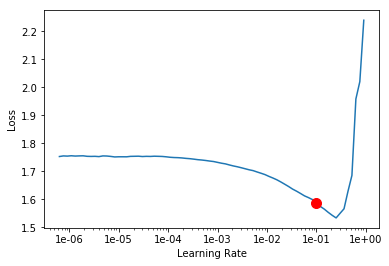

In [38]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [39]:
learner.fit_one_cycle(1, max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,1.197184,1.131788,0.637032,00:01


In [40]:
learner.save(DATA_PATH/'active_contributing_users_stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 2.51E-02


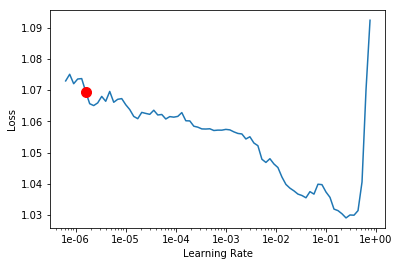

In [41]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [42]:
learner.fit_one_cycle(1, max_lr=7e-06)

epoch,train_loss,valid_loss,accuracy,time
0,1.059701,1.131163,0.637032,00:02


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 3.02E-02


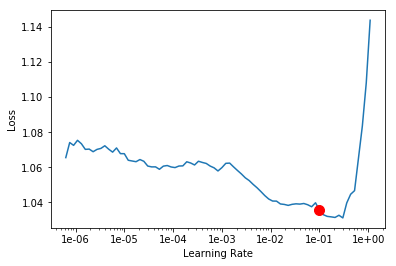

In [43]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [44]:
learner.fit_one_cycle(1, max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,1.010785,1.206733,0.609191,00:01


In [47]:
rows = analysis_df.iloc[0:1000]
correct = 0
for index, row in rows.iterrows():
    prediction = learner.predict(row)
    prediction_val = prediction[0].__str__()
    actual = row['rating'].__str__()
    
    print(f'actual: {actual}. Prediction: {prediction_val}')
    if prediction_val == actual:
        correct += 1
        
    
correct

actual: 1. Prediction: 1
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 4
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 3. Prediction: 5
actual: 2. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 3. Prediction: 4
actual: 3. Prediction: 5
actual: 5. Prediction: 5
actual: 3. Prediction: 1
actual: 5. Prediction: 5
actual: 3. Prediction: 5
actual: 4. Prediction: 5
actual: 1. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 4. Prediction: 5
actual: 3. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 4
actual: 4. Prediction: 4
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 1


actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 1. Prediction: 1
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 4. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 1. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 1. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 1. Prediction: 5
actual: 3. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 1. Prediction: 5
actual: 5. Prediction: 5
actual: 1. Prediction: 5
actual: 2. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 4. Prediction: 5
actual: 4. Prediction: 5


actual: 3. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 3
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 2. Prediction: 4
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 2. Prediction: 2
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 3. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 3. Prediction: 5
actual: 2. Prediction: 1
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 4. Prediction: 5
actual: 1. Prediction: 1
actual: 2. Prediction: 5
actual: 4. Prediction: 5
actual: 1. Prediction: 5
actual: 5. Prediction: 5
actual: 1. Prediction: 1
actual: 5. Prediction: 5
actual: 4. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 3. Prediction: 5
actual: 5. Prediction: 5


actual: 5. Prediction: 5
actual: 5. Prediction: 5
actual: 4. Prediction: 5


660